In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

data = pd.read_csv("D:\Projects\L3PP_AI_ML\data\Mumbai_House_Prices.csv")
data.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [2]:
data = data[data['status'] == 'Ready to move']
data.drop(columns=['status', 'age', 'locality'], inplace=True)

In [3]:
region_to_change = data['region'].value_counts() <= 10
region_to_change = region_to_change[region_to_change == True]
region_to_change.head()

region
Kanjurmarg East      True
Thane East           True
Koproli              True
Sector 20 Kamothe    True
Dahisar West         True
Name: count, dtype: bool

In [4]:
data['region'] = data['region'].apply(lambda x: 'other' if x in region_to_change else x)
data['region'].value_counts().head()

region
Thane West        10929
Mira Road East     5780
Kharghar           1708
Kandivali East     1419
Andheri West       1397
Name: count, dtype: int64

In [5]:
# data = data[data['type'] == 'Apartment']
data.drop_duplicates(inplace=True)
data.loc[data['price_unit'] == 'Cr', 'price'] *= 10000000
data.loc[data['price_unit'] == 'L', 'price'] *= 100000
data.drop(columns=['price_unit'], inplace=True)
data = data[data['type'] != 'Penthouse'] #only one value of Penthouse remained, creating a problem in training

# region_to_change = data['region'].value_counts() <= 10 #same reason as above
# data['region'] = data['region'].apply(lambda x: 'other' if region_to_change[x] else x)

# data = data[data['region'].value_counts() >= 10] #same problem here

# data.loc[data['region'].isin(['Andheri West', 'Andheri East', 'Santacruz East', 'Santacruz West', 'Mahim', 'Prabhadevi', 'Dadar West', 'Dadar East', 'Wadala', 'Lower Parel', 'Byculla', 'Marine Lines', 'Mazagaon', 'Worli', 'Churchgate', 'Kamathipura', 'Peddar Road', 'Shahapur', 'Babulnath Road', 'Malabar Hill', 'Tardeo', 'Girgaon', 'Cuffe Parade', 'Napeansea Road', 'Nalasopara East', 'Juhu', 'Powai']), 'region'] = 'Central Mumbai'
# data.loc[data['region'].isin(['Bandra West', 'Bandra East', 'Borivali West', 'Borivali East', 'Kandivali West', 'Kandivali East', 'Malad West', 'Malad East', 'Sion', 'Goregaon West', 'Goregaon East', 'Versova', 'Vile Parle West', 'Vile Parle East', 'Andheri West', 'Andheri East']), 'region'] = 'Western Suburbs'
# data.loc[data['region'].isin(['Ghatkopar West', 'Ghatkopar East', 'Kurla', 'Kurla East', 'Chembur', 'Bhandup East', 'Bhandup West', 'Mira Road', 'Mulund East', 'Mulund West', 'Kanjurmarg', 'Vikhroli East', 'Vikhroli West', 'Kalyan East', 'Kalyan West', 'Vasind', 'Navi Mumbai', 'Goregaon West', 'Vasai East', 'Kamothe']), 'region'] = 'Eastern Suburbs'
# data.loc[data['region'].isin(['Navi Mumbai', 'Taloja', 'Ulwe', 'Kharghar', 'Panvel', 'Seawoods', 'Khopoli', 'Dombivli', 'Boisar', 'Tardeo', 'Vasai', 'Ghansoli', 'Koparkhairane', 'Airoli', 'Kharghar', 'Vashi', 'Sanpada']), 'region'] = 'Navi Mumbai & Beyond'
# data.loc[data['region'].isin(['Badlapur', 'Badlapur East', 'Badlapur West', 'Nerul', 'Sector 21 Nerul', 'Dahisar', 'Vasai West', 'Sector 14 Vashi', 'Nalasopara West', 'Virar East', 'Virar West', 'Karjat', 'Shil Phata', 'Ambarnath', 'Ulhasnagar', 'Bhayandar East', 'Bhayandar West', 'Sewri', 'Mumbra', 'Taloje', 'Rasayani', 'Saphale', 'Kasheli', 'Uran', 'Palava', 'Vichumbe', 'Dombivali', 'Virar', 'Thane West', 'Mira Road East', 'Ambernath East']), 'region'] = 'Outskirts'
# data = data[data['region'].isin(['Central Mumbai', 'Western Suburbs', 'Eastern Suburbs', 'Navi Mumbai & Beyond', 'Outskirts'])]

# df_encoded = pd.get_dummies(data, columns=['region'], prefix='region')
# df_encoded = pd.get_dummies(df_encoded, columns=['bhk'], prefix='bhk')
# df_encoded = df_encoded.astype(int, errors='ignore')
data.head()
data['region'].value_counts()

region
Mira Road East          3688
Thane West              3502
Kharghar                1105
Dombivali               1064
Kalyan West              988
Kandivali East           984
Ulwe                     852
Andheri West             849
Virar                    660
Powai                    628
Panvel                   541
Malad West               534
Kandivali West           519
Andheri East             499
Chembur                  488
Kanjurmarg               438
Kamothe                  434
Wadala                   425
Borivali West            402
Borivali East            398
Mulund West              394
Goregaon East            354
Malad East               339
Dahisar                  319
Goregaon West            316
Ambernath East           291
other                    279
Ghansoli                 277
Naigaon East             263
Badlapur East            255
Karjat                   248
Santacruz East           245
Taloja                   242
Bhayandar East           234
Vasai  

<Axes: xlabel='price', ylabel='Density'>

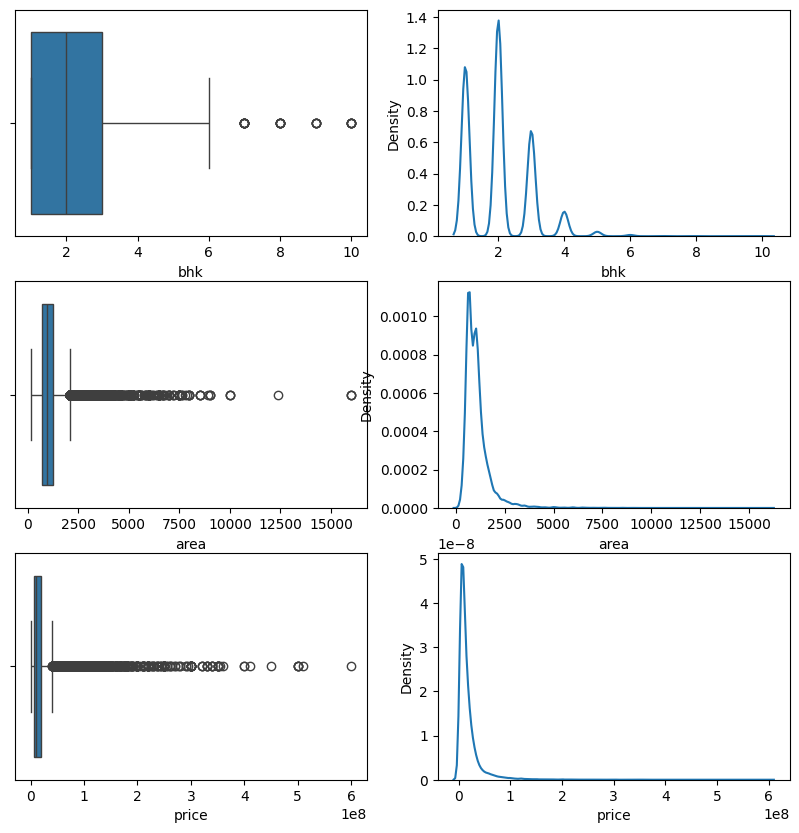

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
sns.boxplot(x=data["bhk"])

plt.subplot(3,2,2)
sns.kdeplot(x=data["bhk"])


plt.subplot(3,2,3)
sns.boxplot(x=data["area"])

plt.subplot(3,2,4)
sns.kdeplot(x=data["area"])


plt.subplot(3,2,5)
sns.boxplot(x=data["price"])

plt.subplot(3,2,6)
sns.kdeplot(x=data["price"])

In [7]:
for col_name in ['bhk', 'area', 'price']:
    # print("For ",col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)

    iqr = q3 - q1

    lower_limit = q1 - (iqr * 1.5)
    upper_limit = q3 + (iqr * 1.5)
    # print("Q1: {}\nQ3: {}\nLower limit: {}\nUpper limit: {}".format(q1, q3, lower_limit, upper_limit))

    data = data[(data[col_name] > lower_limit) & (data[col_name] < upper_limit)]
    # print(data[col_name].describe())

data.shape

(25765, 5)

In [8]:
data.to_csv('Mumbai_Filtered_Data.csv')
print('Data saved to CSV file')
data.head()

Data saved to CSV file


,bhk,type,area,price,region
0,3,Apartment,685,25000000.0,Andheri West
8,1,Apartment,396,2984000.0,Badlapur East
17,3,Apartment,1259,28000000.0,Ghansoli
26,2,Apartment,1080,5724000.0,Bhiwandi
29,2,Apartment,594,3450000.0,Ambernath West


In [22]:
data['region'].unique()

array(['Andheri West', 'Badlapur East', 'Ghansoli', 'Bhiwandi',
       'Ambernath West', 'Taloja', 'Ulwe', 'Badlapur West',
       'Borivali East', 'Nala Sopara', 'Palghar', 'Thane West', 'Parel',
       'Kurla', 'Kalamboli', 'Panvel', 'Boisar', 'Dahisar',
       'Mira Road East', 'Karanjade', 'Kharghar', 'Malad West', 'Girgaon',
       'Vasai', 'Kandivali East', 'Borivali West', 'Bandra West', 'Powai',
       'Kalyan West', 'Mahim', 'Neral', 'Kalyan East', 'Dombivali',
       'Ghatkopar West', 'Mulund East', 'Kamothe', 'other', 'Chembur',
       'Andheri East', 'Ville Parle East', 'Kalwa', 'Khar',
       'Naigaon East', 'Nerul', 'Mulund West', 'Kanjurmarg',
       'Santacruz East', 'Airoli', 'Goregaon West', 'Santacruz West',
       'Bhayandar East', 'Seawoods', 'Karjat', 'Kandivali West', 'Sewri',
       'Ambernath East', 'Nilje Gaon', 'Khopoli', 'Titwala', 'Shil Phata',
       'Vikhroli', 'Goregaon East', 'Ghatkopar East', 'Bhandup West',
       'Virar', 'Koper Khairane', 'Dadar Wes

In [23]:
data['type'].unique()

array(['Apartment', 'Studio Apartment', 'Independent House', 'Villa'],
      dtype=object)

In [9]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression ,Lasso ,ridge_regression
from sklearn.metrics import r2_score,accuracy_score

from sklearn.preprocessing import OneHotEncoder ,StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline,make_pipeline

In [10]:
X = data.iloc[:, [0,1,2,4]]
Y = data.iloc[:, -2]
X.head()

,bhk,type,area,region
0,3,Apartment,685,Andheri West
8,1,Apartment,396,Badlapur East
17,3,Apartment,1259,Ghansoli
26,2,Apartment,1080,Bhiwandi
29,2,Apartment,594,Ambernath West


In [11]:
X['type'].value_counts()

type
Apartment            25203
Studio Apartment       494
Villa                   40
Independent House       28
Name: count, dtype: int64

In [12]:
X['region'].value_counts()

region
Mira Road East          3667
Thane West              3112
Dombivali               1049
Kharghar                1049
Kalyan West              981
Kandivali East           910
Ulwe                     845
Virar                    659
Malad West               502
Panvel                   501
Kandivali West           490
Andheri West             473
Andheri East             467
Powai                    449
Kamothe                  434
Kanjurmarg               434
Chembur                  406
Borivali East            373
Borivali West            360
Mulund West              350
Dahisar                  317
Goregaon East            295
Malad East               291
Ambernath East           291
Wadala                   283
Goregaon West            272
Naigaon East             263
Ghansoli                 263
Badlapur East            255
Karjat                   248
other                    245
Taloja                   242
Bhayandar East           234
Nala Sopara              229
Vasai  

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
X_train.shape

(20612, 4)

In [15]:
X_test.shape

(5153, 4)

In [16]:
column_transform = ColumnTransformer([
    ("transform" ,OneHotEncoder(sparse_output=False ,drop="first", handle_unknown="ignore") ,[1,3])
],remainder="passthrough")
scaler = StandardScaler()
lr = LinearRegression()
pipe = make_pipeline(column_transform ,scaler ,lr)

In [17]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transform',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 3])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [18]:
X_test.head()

,bhk,type,area,region
67919,1,Apartment,575,Thane West
62428,2,Apartment,1070,Kalyan West
25576,2,Apartment,1225,Kharghar
6485,2,Apartment,1230,Kamothe
26690,2,Apartment,440,Panvel


In [19]:
Y_pred = pipe.predict(X_test)

c:\Users\shivam\.conda\envs\ai-ml-venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [20]:
r2_score(Y_pred ,Y_test)

0.7645059076283699

In [21]:
import pickle

with open('house_price_model.pkl', 'wb') as file:
    pickle.dump(pipe, file)


In [1]:
import pickle

# Load the model
with open('house_price_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Example prediction with the correct feature order
sample_input = [[3, 'Apartment', 1200, 'Kalyan West']]  # [bhk, type, area, region]
prediction = model.predict(sample_input)
prediction

c:\Users\shivam\.conda\envs\ai-ml-venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([11980498.95888237])